## 練習時間
在小量的資料上，我們用眼睛就可以看得出來程式碼是否有跑出我們理想中的結果

請嘗試想像一個你需要的資料結構 (裡面的值可以是隨機的)，然後用上述的方法把它變成 pandas DataFrame

#### Ex: 想像一個 dataframe 有兩個欄位，一個是國家，一個是人口，求人口數最多的國家

### Hints: [隨機產生數值](https://blog.csdn.net/christianashannon/article/details/78867204)

In [1]:
import pandas as pd
import numpy as np

In [2]:
pop_list = np.random.randint(1000000, 100000000, 5)

data = {'country' : ['Taiwan','China','Japan','Korea','Philippines'],
        'population' : pop_list}

countries = pd.DataFrame(data)

In [3]:
countries[countries['population'] == countries['population'].max()]['country']

4    Philippines
Name: country, dtype: object

## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

In [1]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

In [2]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [3]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = '\n'

data = data.split(split_tag)
print(len(data))
data[0]

9996


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

## 將 txt 轉成 pandas dataframe

In [4]:
import pandas as pd
import numpy as np
   
arrange_data = [i.split('\t') for i in data]

df = pd.DataFrame(arrange_data)
df.head(10)

0                                                  1
0  n00015388_157  http://farm1.static.flickr.com/145/430300483_2...
1  n00015388_238  http://farm2.static.flickr.com/1005/3352960681...
2  n00015388_304  http://farm1.static.flickr.com/27/51009336_a96...
3  n00015388_327  http://farm4.static.flickr.com/3025/2444687979...
4  n00015388_355  http://img100.imageshack.us/img100/3253/forres...
5  n00015388_373  http://img172.imageshack.us/img172/4606/napo03...
6  n00015388_379  http://fotootjesvanannelies.web-log.nl/olifant...
7  n00015388_388  http://www.deweekkrant.nl/images/library/pictu...
8  n00015388_442  http://www.porschemania.it/discus/messages/815...
9  n00015388_474  http://farm1.static.flickr.com/72/225029238_80...

## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

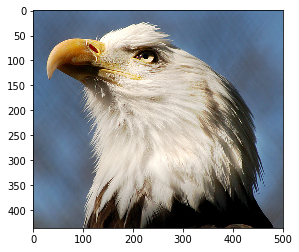

In [5]:
%matplotlib inline

from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[0, 1]

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array
img_convert_ndarray = np.array(img)

plt.imshow(img)
plt.show()

In [6]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
 
    img_list = []
    
    for i in url_list:

        try:
            response = requests.get(i)
            img = Image.open(BytesIO(response.content))
            img_convert_ndarray = np.array(img)
    
            img_list.append(img_convert_ndarray)
        except:
            print('exception encountered') 
                  
    return img_list

exception encountered
Total images that we got: 4 


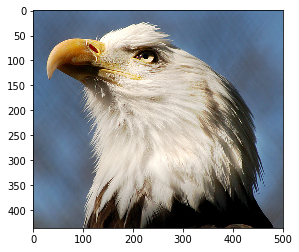

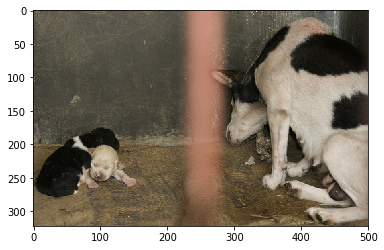

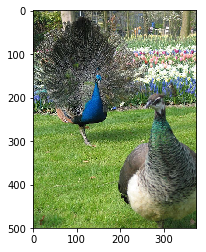

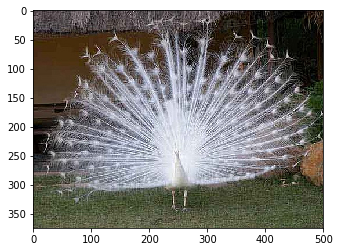

In [7]:
result = img2arr_fromURLs(df[0:5][1].values)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()